In [1]:
%cd /home/smalani/Cybernetic/growthcurvefit/
import pandas as pd

/home/smalani/Cybernetic/growthcurvefit


In [2]:
df = pd.read_csv('/home/smalani/Cybernetic/growthcurvefit/data/Data_For_Importation.csv')
df.head()

df['M0'] = df['M0'] * 10 / 6
df['M1'] = df['M1'] * 10 / 6
df['M2'] = df['M2'] * 10 / 6
df['M3'] = df['M3'] * 10 / 6
df['M4'] = df['M4'] * 10 / 6
df['M5'] = df['M5'] * 10 / 6
df['M6'] = df['M6'] * 10 / 6
df['M7'] = df['M7'] * 10 / 6


In [3]:
df_par = pd.read_csv('/home/smalani/Cybernetic/growthcurvefit/data/LightParameter.csv')
print(df_par.head())
print(df_par)

df_dict = df_par.to_dict('list')


   M0  M1    M2    M3   M4   M5  M6  M7
0   0   0  0.01  0.01  0.1  0.1   1   1
   M0  M1    M2    M3   M4   M5  M6  M7
0   0   0  0.01  0.01  0.1  0.1   1   1


In [4]:
df_par.nunique(axis=1)[0]

4

In [13]:
def growthfun(t,x,p):

    # Parameters
    mu_max, Ks, Y = p

    # Variables
    S, X = x
    
    
    mu = mu_max * S #/ (Ks + S)

    dSdt = - (mu / (Y+1e-10)) * X
    dXdt = mu * X

    return [dSdt, dXdt]

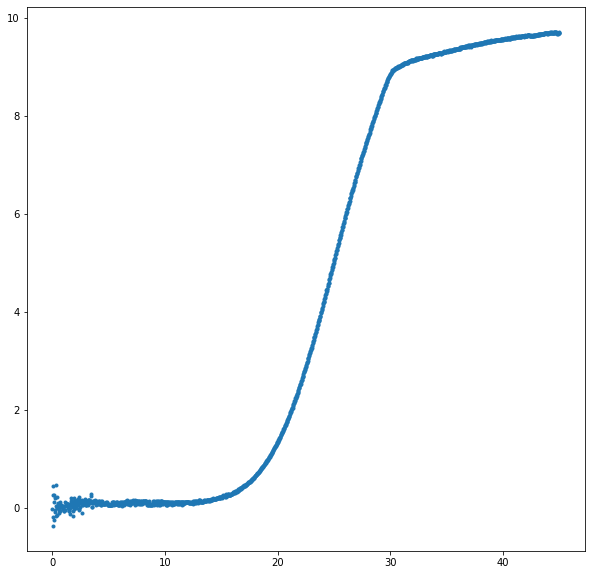

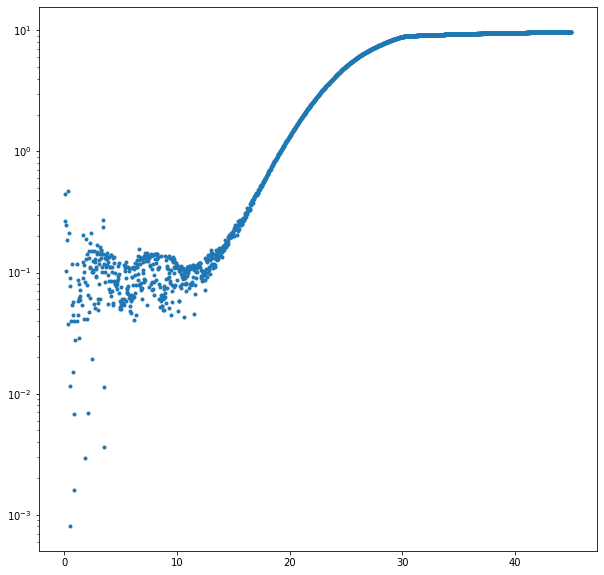

In [14]:
import matplotlib.pyplot as plt



fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.plot(df['Time'], df['M0'], '.', label='M0')

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.semilogy(df['Time'], df['M0'], '.', label='M0')

In [15]:
import numpy as np
from scipy.integrate import solve_ivp

def fsolvefun(pars):
    X0, mu_max, Ks, Y = pars

    xinit = [2, X0]
    tspan = [df['Time'].iloc[0], df['Time'].iloc[-1]]


    par_fit = [mu_max, Ks, Y]

    sol = solve_ivp(growthfun, tspan, xinit, args=(par_fit,), method='BDF', t_eval=df['Time'], rtol=1e-6, atol=1e-9)

    return np.mean((sol.y[1,:] - df['M0']) ** 2)

In [16]:
print(df['Time'].iloc[-1])

45.01117778


In [17]:
from scipy.optimize import minimize

fsolve_guess = [0.1, 0.1, 0.1, 0.1]
fsolve_sol = minimize(fsolvefun, fsolve_guess, method='L-BFGS-B', bounds=((0, None), (0, None), (0, None), (0, None)))

print(fsolve_sol)


      fun: 0.007929442118196118
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([-9.79296349e-03, -3.04258528e-04,  0.00000000e+00, -2.78978231e-06])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 515
      nit: 59
     njev: 103
   status: 0
  success: True
        x: array([5.30719634e-04, 1.98610991e-01, 1.00000000e-01, 4.79810979e+00])


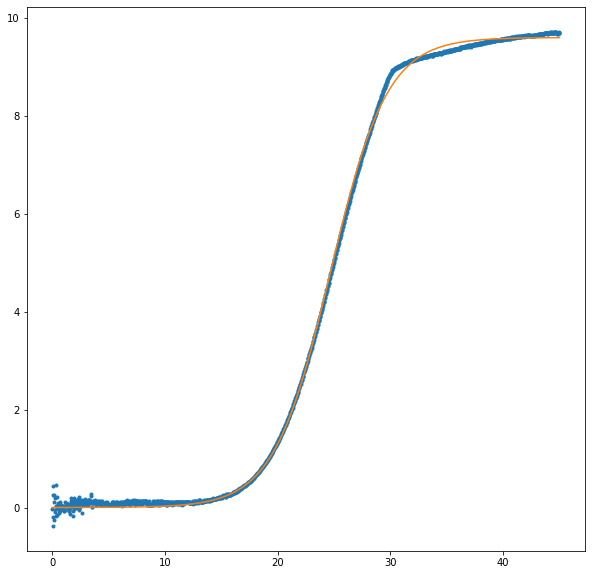

In [18]:
import matplotlib.pyplot as plt

xinit = [2, fsolve_sol.x[0]]
tspan = [df['Time'].iloc[0], df['Time'].iloc[-1]]
sol = solve_ivp(growthfun, tspan, xinit, args=(fsolve_sol.x[1:],), method='BDF', t_eval=df['Time'], rtol=1e-6, atol=1e-9)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.plot(df['Time'], df['M0'], '.', label='M0')
ax.plot(sol.t, sol.y[1,:], label='Fit')

In [19]:
import numpy as np
from scipy.integrate import solve_ivp

def fsolvefun(pars):
    X0, mu_max_0, mu_max_1, mu_max_10,mu_max_100, Ks, Y = pars
    error = 0
    X0 = 0.01

    xinit = [2, X0]
    tspan = [df['Time'].iloc[0], df['Time'].iloc[-1]]


    par_fit = [mu_max_0, Ks, Y]
    sol = solve_ivp(growthfun, tspan, xinit, args=(par_fit,), method='BDF', t_eval=df['Time'], rtol=1e-6, atol=1e-9)
    error += np.mean((sol.y[1,:] - df['M0']) ** 2)
    error += np.mean((sol.y[1,:] - df['M1']) ** 2)

    par_fit = [mu_max_1, Ks, Y]
    sol = solve_ivp(growthfun, tspan, xinit, args=(par_fit,), method='BDF', t_eval=df['Time'], rtol=1e-6, atol=1e-9)
    error += np.mean((sol.y[1,:] - df['M2']) ** 2)
    error += np.mean((sol.y[1,:] - df['M3']) ** 2)

    par_fit = [mu_max_10, Ks, Y]
    sol = solve_ivp(growthfun, tspan, xinit, args=(par_fit,), method='BDF', t_eval=df['Time'], rtol=1e-6, atol=1e-9)
    error += np.mean((sol.y[1,:] - df['M4']) ** 2)
    error += np.mean((sol.y[1,:] - df['M5']) ** 2)

    par_fit = [mu_max_100, Ks, Y]
    sol = solve_ivp(growthfun, tspan, xinit, args=(par_fit,), method='BDF', t_eval=df['Time'], rtol=1e-6, atol=1e-9)
    error += np.mean((sol.y[1,:] - df['M6']) ** 2)
    error += np.mean((sol.y[1,:] - df['M7']) ** 2)

    return error

In [20]:
fsolve_guess = [6.50948985e-04, 1.87508134e+00, 1.87508134e+00, 1.87508134e+00/2, 1.87508134e+00/4, 8.37253788e+00, 2.86796049e+00]
fsolve_sol = minimize(fsolvefun, fsolve_guess, method='L-BFGS-B', bounds=((0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None)), options={'eps': 1e-11})
print(fsolve_sol)

      fun: 1.4184667208626158
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.00000000e+00, -1.06581402e-03,  2.66453504e-04,  1.31006306e-03,
       -4.44089173e-05,  0.00000000e+00,  4.44089173e-04])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 472
      nit: 32
     njev: 59
   status: 0
  success: True
        x: array([6.50948985e-04, 1.41273816e-01, 1.45893288e-01, 8.45916674e-02,
       4.20399927e-02, 8.37253788e+00, 5.04237418e+00])


Text(0, 0.5, 'mu[t=0]')

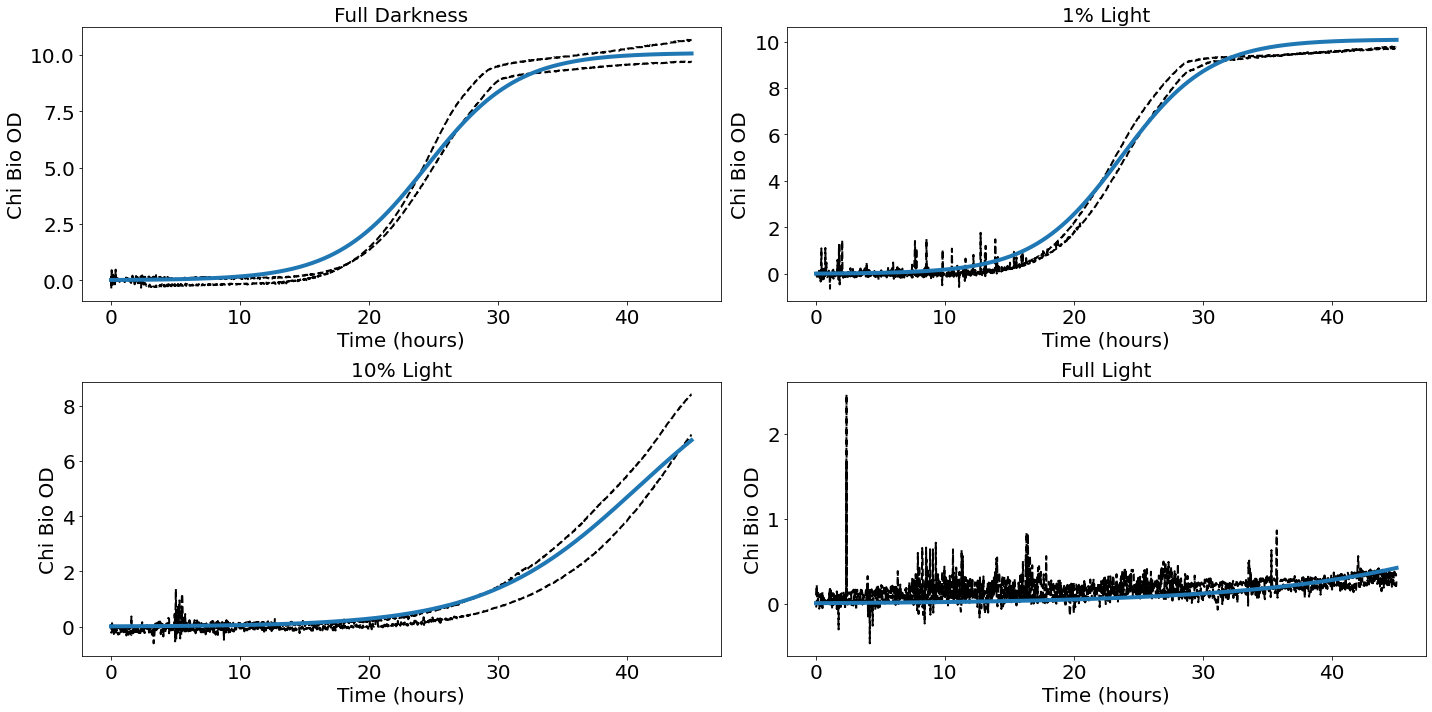

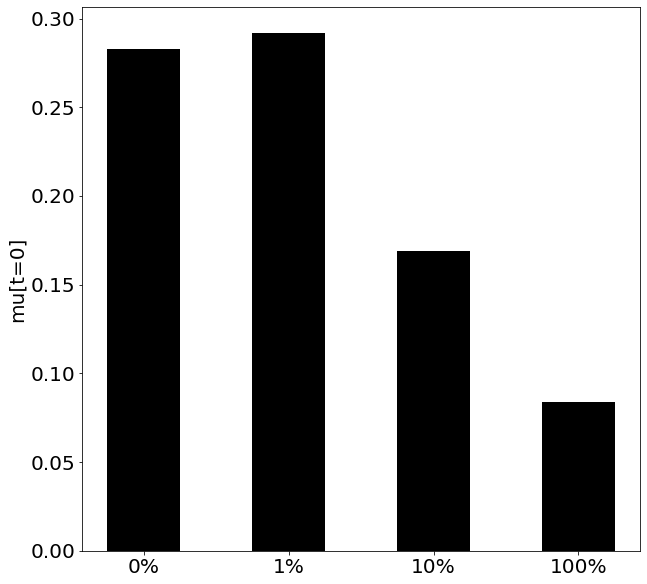

In [22]:
import matplotlib.pyplot as plt

X0, mu_max_0, mu_max_1, mu_max_10,mu_max_100, Ks, Y = fsolve_sol.x
X0 = 0.01

my_mu0 = mu_max_0 * 2 #/ (fsolve_sol.x[-2] + 2)
my_mu1 = mu_max_1 * 2 #/ (fsolve_sol.x[-2] + 2)
my_mu10 = mu_max_10 * 2 #/ (fsolve_sol.x[-2] + 2)
my_mu100 = mu_max_100 * 2 #/ (fsolve_sol.x[-2] + 2)

xinit = [2, X0]
tspan = [df['Time'].iloc[0], df['Time'].iloc[-1]]

par_fit = [mu_max_0, Ks, Y]
sol = solve_ivp(growthfun, tspan, xinit, args=(par_fit,), method='BDF', t_eval=df['Time'], rtol=1e-6, atol=1e-9)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(221)
ax.plot(df['Time'], df['M0'], 'k--', label='M0', linewidth=2)
ax.plot(df['Time'], df['M1'], 'k--', label='M1', linewidth=2)
ax.plot(sol.t, sol.y[1,:], label='Fit', linewidth=4)
ax.set_xlabel('Time (hours)', fontsize=20)
ax.set_ylabel('Chi Bio OD', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_title('Full Darkness', fontsize=20)

par_fit = [mu_max_1, Ks, Y]
sol = solve_ivp(growthfun, tspan, xinit, args=(par_fit,), method='BDF', t_eval=df['Time'], rtol=1e-6, atol=1e-9)
ax = fig.add_subplot(222)
ax.plot(df['Time'], df['M2'], 'k--', label='M2', linewidth=2)
ax.plot(df['Time'], df['M3'], 'k--', label='M3', linewidth=2)
ax.plot(sol.t, sol.y[1,:], label='Fit', linewidth=4)
ax.set_xlabel('Time (hours)', fontsize=20)
ax.set_ylabel('Chi Bio OD', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_title('1% Light', fontsize=20)

par_fit = [mu_max_10, Ks, Y]
sol = solve_ivp(growthfun, tspan, xinit, args=(par_fit,), method='BDF', t_eval=df['Time'], rtol=1e-6, atol=1e-9)
ax = fig.add_subplot(223)
ax.plot(df['Time'], df['M4'], 'k--', label='M4', linewidth=2)
ax.plot(df['Time'], df['M5'], 'k--', label='M5', linewidth=2)
ax.plot(sol.t, sol.y[1,:], label='Fit', linewidth=4)
ax.set_xlabel('Time (hours)', fontsize=20)
ax.set_ylabel('Chi Bio OD', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_title('10% Light', fontsize=20)

par_fit = [mu_max_100, Ks, Y]
sol = solve_ivp(growthfun, tspan, xinit, args=(par_fit,), method='BDF', t_eval=df['Time'], rtol=1e-6, atol=1e-9)
ax = fig.add_subplot(224)
ax.plot(df['Time'], df['M6'], 'k--', label='M6', linewidth=2)
ax.plot(df['Time'], df['M7'], 'k--', label='M7', linewidth=2)
ax.plot(sol.t, sol.y[1,:], label='Fit', linewidth=4)
ax.set_xlabel('Time (hours)', fontsize=20)
ax.set_ylabel('Chi Bio OD', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_title('Full Light', fontsize=20)

plt.tight_layout()


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.bar([0,1,2,3], [my_mu0, my_mu1, my_mu10, my_mu100], width=0.5, color='k')
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['0%','1%','10%','100%'], fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_ylabel('mu[t=0]', fontsize=20)